Course      : CS513 - Knowledge Discovery and Data Mining
First Name  : John
Last Name   : Rizzo
Student ID  : 20036833
Purpose     : CS513_HW03_KNN

The “breast cancer dataset” in CANVAS was obtained from the University of Wisconsin Hospitals, Madison from Dr. William H. Wolberg. The features in the dataset, described below, have been categorized from 1 to 10.
Use the knn methodology (k=3,5 and 10) to develop a classification models for the Diagnosis. 
Use 30% test 70% training data. 

     Features                      Domain
   -- -----------------------------------------
   Sample code number               id number
   F1. Clump Thickness               1 - 10
   F2. Uniformity of Cell Size       1 - 10
   F3. Uniformity of Cell Shape      1 - 10
   F4. Marginal Adhesion             1 - 10
   F5. Single Epithelial Cell Size   1 - 10
   F6. Bare Nuclei                   1 - 10
   F7. Bland Chromatin               1 - 10
   F8. Normal Nucleoli               1 - 10
   F9. Mitoses                       1 - 10
   Diagnosis Class:                 (2 for benign, 4 for malignant)

In [1]:
import random

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# %matplotlib inline

In [2]:
coltype = {
    'Sample': 'Int64',
    'F1': 'Int64',
    'F2': 'Int64',
    'F3': 'Int64',
    'F4': 'Int64',
    'F5': 'Int64',
    'F6': 'Int64',
    'F7': 'Int64',
    'F8': 'Int64',
    'F9': 'Int64',
    'Class': 'Int64'
}

folder = '../data/'

df = pd.read_csv(folder + 'breast-cancer-wisconsin.csv',
                 na_values='?', 
                 dtype=coltype)
df.head()

,Sample,F1,F2,F3,F4,F5,F6,F7,F8,F9,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [3]:
# Replacing the missing values with the mean of the column
# this happens for F6
df['F6']=df['F6'].fillna(df['F6'].mean().round())

In [4]:
attr = df.drop(columns=['Class'])
target = df['Class']

scaler = MinMaxScaler()
attr = pd.DataFrame(scaler.fit_transform(attr), columns=attr.columns)

In [5]:
random_state = 42
random.seed(random_state)

# Splitting training set into 30% test and 70% train
attr_train, attr_test, target_train, target_test = train_test_split(attr,
                                                                    target,
                                                                    test_size=0.3,
                                                                    random_state=random_state,
                                                                    shuffle=True)

In [6]:
k_values = [3, 5, 10]

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(attr_train, target_train)
    target_pred = knn.predict(attr_test)
    accuracy = accuracy_score(target_test, target_pred)
    print(f'Accuracy for k={k}: {accuracy:.3f}')

Accuracy for k=3: 0.971
Accuracy for k=5: 0.976
Accuracy for k=10: 0.967


In [7]:
cm=confusion_matrix(target_test, target_pred)

print('Confusion Matrix')
print(confusion_matrix(target_test, target_pred))
print()
print('Accuracy score')
print(accuracy_score(target_test, target_pred))
print()
print('Classification Report')
print(classification_report(target_test, target_pred))

Confusion Matrix
[[141   2]
 [  5  62]]

Accuracy score
0.9666666666666667

Classification Report
              precision    recall  f1-score   support

         2.0       0.97      0.99      0.98       143
         4.0       0.97      0.93      0.95        67

    accuracy                           0.97       210
   macro avg       0.97      0.96      0.96       210
weighted avg       0.97      0.97      0.97       210



In [8]:
test_actual=attr_test
test_actual['target_pred']=target_pred
test_actual['test_actual']=target_test
test_actual.head()

,Sample,F1,F2,F3,F4,F5,F6,F7,F8,F9,target_pred,test_actual
158,0.084527,0.000000,0.000000,0.111111,0.000000,0.222222,0.333333,0.000000,0.0,0.0,2.0,2
499,0.086339,0.333333,0.000000,0.000000,0.000000,0.111111,0.000000,0.111111,0.0,0.0,2.0,2
396,0.083221,0.222222,0.000000,0.000000,0.000000,0.111111,0.000000,0.222222,0.0,0.0,2.0,2
155,0.084426,0.444444,0.444444,0.444444,0.555556,0.222222,1.000000,0.222222,0.0,0.0,4.0,4
321,0.050177,0.222222,0.000000,0.000000,0.000000,0.111111,0.333333,0.222222,0.0,0.0,2.0,2


In [9]:
freq_table = pd.crosstab(test_actual['test_actual'], test_actual['target_pred'])
print("Confusion Matrix")
print(freq_table)

Confusion Matrix
target_pred  2.0  4.0
test_actual          
2            141    2
4              5   62


Text(0.5, 1.0, 'Confusion Matrix')

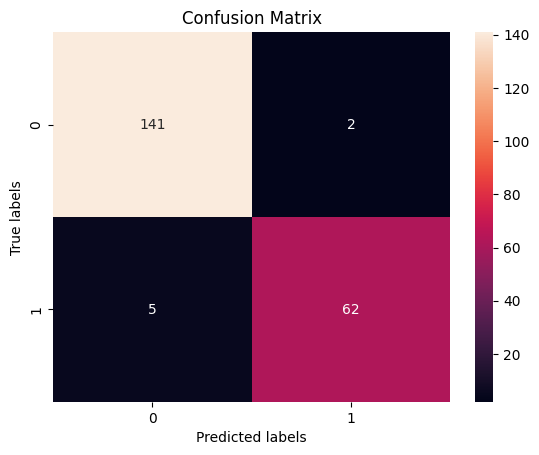

In [10]:
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Confusion Matrix')